Title: Visualization of the Brain Structure in Schizophrenia using Dimension Reduction Analysis
By: Shaun Chen

Data provided by Fred Bookstein
https://sbmorphometrics.org/data/book-schizo.dta
 - A little data set of 13 landmarks for 28 parasagittal brain images: 14 "normals" and 14 schizophrenics

Biomedical Question: Is dimensionality reduction useful on brain landmarks for determining trends in schizophrenic patients?

In [44]:
import os
import sys
import warnings

sys.path.append(os.path.dirname(os.getcwd()))
warnings.filterwarnings("ignore")

In [45]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import geomstats.visualization as visualization
import geomstats.backend as gs
import geomstats.datasets.utils as data_utils
from geomstats.geometry.pre_shape import PreShapeSpace, KendallShapeMetric

visualization.tutorial_matplotlib()

In [46]:
data = pandas.read_csv('book-schizo.csv').to_numpy().reshape(13,28,2) #read csv file and convert to numpy array, 364x2 reshaped into 13x2x28
labels = np.append(np.zeros(14, dtype=int), np.ones(14, dtype=int)) #create labels for each class

In [47]:
print(data.shape)
print(labels.shape)

(13, 28, 2)
(28,)


A little data set of 13 landmarks for 28 parasagittal brain images: 14 "normals" and 14 schizophrenics
First 14 are normal, other 14 are schizophrenic

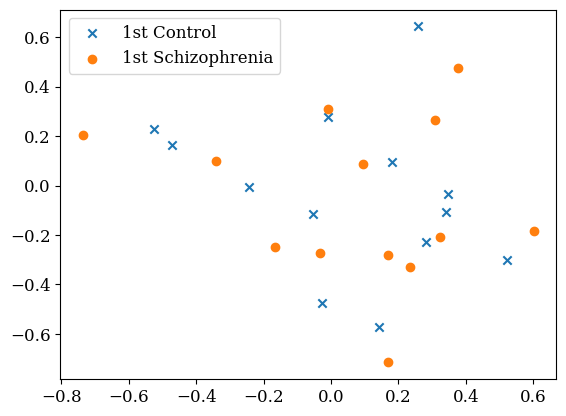

In [73]:
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.scatter(data[:,0,0],data[:,0,1], marker='x') #1st normal
plt.scatter(data[:,14,0],data[:,14,1], marker='o') #1st schizo
plt.legend(['1st Control', '1st Schizophrenia'])
plt.show()

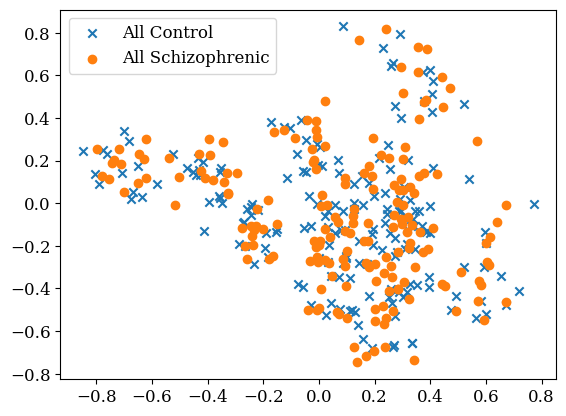

In [74]:
plt.scatter(data[:,:14,0],data[:,:14,1], marker='x') #all normals
plt.scatter(data[:,14:,0],data[:,14:,1], marker='o') #all shizos
plt.legend(['All Control', 'All Schizophrenic'])
plt.show()

In [ ]:
from geomstats.geometry.pre_shape import PreShapeSpace, KendallShapeMetric
from geomstats.geometry.euclidean import EuclideanMetric

eucl_metric = EuclideanMetric(3 * 22)
hands_vec = hands.reshape(52, -1)
eucl_pair_dist = eucl_metric.dist_pairwise(hands_vec)


plt.figure(figsize=(4, 4))
plt.imshow(eucl_pair_dist)

In [70]:
m_ambient = 2
k_landmarks = 13
preshape = PreShapeSpace(m_ambient=m_ambient, k_landmarks=k_landmarks)
matrices_metric = preshape.embedding_space.metric

sizes = matrices_metric.norm(preshape.center(data))

In [71]:
from scipy import stats

signif_level = 0.05

tstat, pvalue = stats.ttest_ind(data[:,:14,:], data[:,14:,:])
print(pvalue < signif_level)

[[False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]]


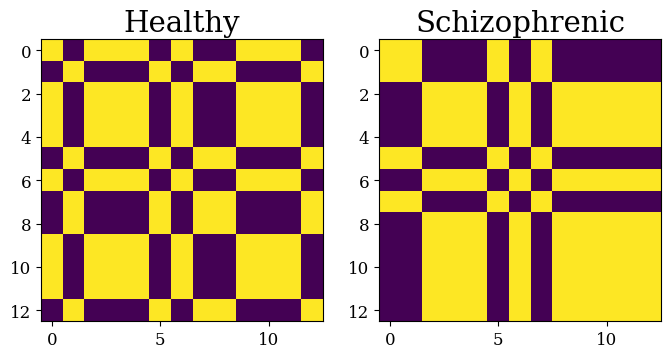

In [89]:
labels_str = ["Healthy", "Schizophrenic"]

fig = plt.figure(figsize=(8, 4))

corr_matrix = np.corrcoef(data[:,0,:])

ax = fig.add_subplot(121)
imgplot = ax.imshow(np.corrcoef(data[:,0,:])); ax.set_title(labels_str[labels[0]])
ax = fig.add_subplot(122)
imgplot = ax.imshow(np.corrcoef(data[:,14,:])); ax.set_title(labels_str[labels[14]])

plt.show()